<a href="https://colab.research.google.com/github/AdityaIf/Studi-Independen/blob/main/Aditya_ilham_firdaus_kelompok_7_project_mini_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kelompok 7
1. Aditya Ilham Firdaus(Cordoba)
2. Ahmad Azmil Marrom(Cordoba)
3. Nisa Luvira (Cordoba)
4. Nova Nurul Putri (Jupyter XXI)
5. Muh Tegar Lazuardi (Jupyter XXI)

#Problem Scoping
1. Who: kelompok 7
2. what: mengklasifikasikan Cat vs Dog
3. where: petshop
4. why: mengklasifikasikan Cat vs Dog melalui tahapan data akuisisi, exploration,modeling, dan evaluating

# Import Library

In [ ]:
# IMPORT TENSORFLOW
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
tf.test.gpu_device_name()

''

# import data set dari kaggle

In [ ]:
!wget --no-check-certificate \
  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2022-03-28 11:41:55--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.122.41.53, 2600:1407:3c00:10a2::e59, 2600:1407:3c00:108c::e59
Connecting to download.microsoft.com (download.microsoft.com)|104.122.41.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M   139MB/s    in 6.0s    

2022-03-28 11:42:01 (132 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [ ]:
import zipfile
local_zip = '/content/kagglecatsanddogs_3367a.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import os
os.listdir('/content/PetImages')

['Dog', 'Cat']

In [ ]:
# PANGGIL NAMA DIRECTORY UTAMA
DIRECTORY = "PetImages"

# PANGGIL SUB DIRECTORY ATAU SUB FOLDER (KATEGORI)
CATEGORIES = ["Cat", "Dog"]

In [ ]:
# CEK KEMBALI SUB DIRECTORY
CATEGORIES

['Cat', 'Dog']

# Data exploration

In [ ]:
import os 
len(os.listdir("PetImages/Dog"))

12501

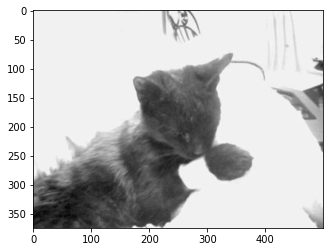

Cat


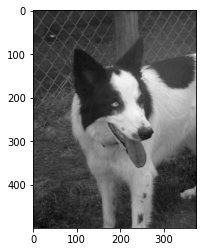

Dog


In [ ]:
# CEK ISI GAMBAR PERTAMA
import cv2
import matplotlib.pyplot as plt

for kategori in CATEGORIES:
    # MASUK KE DALAM DIRECTORY PETIMAGES > CAT KEMUDIAN PETIMAGES > DOG
    masukDirektori = os.path.join(DIRECTORY, kategori)

    """
    TES APAKAH FILE DIRECTORY DAPAT TERBACA DENGAN BAIK.
    TAMPILKAN SALAH SATU GAMBAR PADA SUB DIRECTORY.
    DAN DENGAN WARNA GREYSCALE.
    """

    for gambar in os.listdir(masukDirektori):
        gambarArray = cv2.imread(os.path.join(masukDirektori,gambar), cv2.IMREAD_GRAYSCALE)
        plt.imshow(gambarArray, cmap="gray")
        plt.show()
        # GUNAKAN BREAK UNTUK LOADING HANYA 1 GAMBAR
        break
    print(kategori)

In [ ]:
# VARIABEL DENGAN TIPE DATA LIST KOSONG UNTUK MENAMPUNG DATA GAMBAR
data = []
target=[]


for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    i=0
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        # print(arr)
        # PEMBERIAN LABEL KE SETIAP GAMBAR
        try:
          # RESIZE UNTUK NORMALISASI UKURAN DATA.
          # GAMBAR DIPADATKAN MENJADI PERSEGI, DISINI MEMAKAI UKURAN 60px x 60px.
          new_arr = cv2.resize(arr, (60, 60))
          # APPEND DIGUNAKAN UNTUK MENGISI NILAI GAMBAR DAN LABEL KE DALAM VARIABEL DATA
          data.append(new_arr)
          target.append(label)

        except Exception as e:
          print(str(e))
        i+=1
        if i==200:
          break

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [ ]:
data

[array([[229, 229, 229, ..., 229, 229, 227],
        [229, 229, 229, ..., 229, 229, 229],
        [229, 229, 229, ..., 229, 229, 229],
        ...,
        [ 47,  42,  38, ..., 166, 161, 169],
        [ 40,  48,  61, ..., 233, 175, 145],
        [ 53,  59,  50, ..., 229, 227, 129]], dtype=uint8),
 array([[231, 192, 200, ..., 160, 160, 160],
        [229, 189, 206, ..., 152, 151, 150],
        [234, 194, 207, ..., 143, 143, 145],
        ...,
        [227, 228, 228, ...,  35,  39,  43],
        [228, 229, 231, ...,  33,  39,  47],
        [228, 231, 233, ...,  36,  43,  49]], dtype=uint8),
 array([[255, 255, 254, ..., 251, 255, 255],
        [255, 255, 209, ..., 208, 251, 255],
        [254, 211, 143, ..., 159, 209, 251],
        ...,
        [253, 177, 104, ..., 102, 173, 244],
        [255, 255, 180, ..., 176, 245, 252],
        [255, 253, 251, ..., 243, 254, 255]], dtype=uint8),
 array([[ 98,  98, 100, ..., 109, 154, 133],
        [ 97,  98,  97, ..., 105, 149, 135],
        [ 99, 10

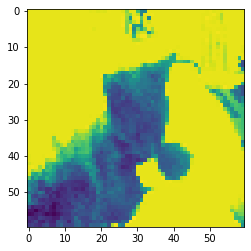

In [ ]:
plt.imshow(data[0])

In [ ]:
print(target[0])

0


In [ ]:
len(data)

399

In [ ]:
data[0][1]

array([229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229,
       229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229,
       230, 206, 197, 229, 217, 112, 230, 230, 231, 229, 229, 229, 229,
       229, 229, 229, 229, 229, 229, 229, 229, 229, 228, 228, 229, 231,
       227, 209, 229, 229, 229, 229, 229, 229], dtype=uint8)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( data, target, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Membangun Model CV menggunakan C-NN

In [ ]:
1# UNTUK MEMULAI NEURAL NETWORK MODEL DENGAN KERAS DIGUNAKAN FUNGSI Sequential()
model = Sequential()

"""
Conv2D ADALAH 2D CONVOLUTION LAYER.
LAYER INI MEMBUAT SEBUAH KERNEL AGAR DAPAT MEMPRODUKSI KELUARAN DARI LAYER INPUT.
DIREKOMENDASIKAN MEMULAI FILTER PADA RENTANG (32, 64, 128).
BISA DITINGKATKAN KE (256, 512, 1024) UNTUK LAYER YANG LEBIH DALAM.

RELU SINGKATAN DARI RECTIFIED LINEAR UNIT, YAITU FUNGSI AKTIVASI YANG PALING UMUM
DIGUNAKAN DALAM NEURAL NETWORK, TERUTAMA CNN.

MAXPOOLING ADALAH STRATEGI DOWNSAMPLING DALAM CONVOLUTIONAL NEURAL NETWORKS.
DIGUNAKAN FILTER 2x2.
TAHAP DOWNSAMPLING MERUPAKAN PROSES UNTUK MENURUNKAN JUMLAH PIKSEL,
MEMPERTAHANKAN INFORMASI DARI CITRA NAMUN MENGHASILKAN UKURAN CITRA YANG LEBIH KECIL.
"""

model.add(Conv2D(64, (3,3), activation = 'relu',input_shape=(60,60,1)))
model.add(MaxPooling2D((2,2)))

# MENGGUNAKAN 2 LAYER CONVOLUTION

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

# FLATTEN AKAN MERATAKAN SEMUA NILAI TENSOR MENJADI TENSOR 1D
model.add(Flatten())

"""
DENSE LAYER ADALAH LAPISAN YANG TERHUBUNG PENUH.
SEMUA NEURON DALAM LAPISAN TERHUBUNG DENGAN NEURON DALAM LAPISAN BERIKUTNYA.
"""
model.add(Dense(64, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
import numpy as np
X_train = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')
X_train = X_train / 255.
X_test = X_test/ 255.

In [ ]:
y_train=np.array(y_train)
y_test=np.array(y_test)

# Evaluation

In [ ]:
history = model.fit(X_train,y_train,
      steps_per_epoch=8,  
      epochs=15,
      validation_data = (X_test,y_test)
)

Epoch 1/15
8/8 [==============================] - 3s 255ms/step - loss: 0.6996 - accuracy: 0.5266 - val_loss: 0.6951 - val_accuracy: 0.4250
Epoch 2/15
8/8 [==============================] - 2s 237ms/step - loss: 0.6906 - accuracy: 0.5235 - val_loss: 0.7058 - val_accuracy: 0.4250
Epoch 3/15
8/8 [==============================] - 2s 237ms/step - loss: 0.6850 - accuracy: 0.5266 - val_loss: 0.6952 - val_accuracy: 0.4375
Epoch 4/15
8/8 [==============================] - 2s 233ms/step - loss: 0.6765 - accuracy: 0.5486 - val_loss: 0.7044 - val_accuracy: 0.4375
Epoch 5/15
8/8 [==============================] - 2s 236ms/step - loss: 0.6750 - accuracy: 0.5611 - val_loss: 0.7735 - val_accuracy: 0.4250
Epoch 6/15
8/8 [==============================] - 2s 239ms/step - loss: 0.6799 - accuracy: 0.5392 - val_loss: 0.6823 - val_accuracy: 0.5625
Epoch 7/15
8/8 [==============================] - 2s 237ms/step - loss: 0.6492 - accuracy: 0.6050 - val_loss: 0.7272 - val_accuracy: 0.4375
Epoch 8/15
8/8 [====